In [2]:
import warnings
warnings.filterwarnings('ignore')



In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Dense,LSTM , GlobalMaxPooling1D
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import  Embedding
from tensorflow.keras.models import Sequential

In [4]:
df = pd.read_csv('c:/Users/RATHIKA/spam.csv', encoding='ISO-8859-1')

In [5]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [6]:
df = df.drop(["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"], axis=1)
df.columns = ['category', 'email']
df['label']= df.category.map(dict(ham=0,spam=1))
df.head()

,category,email,label
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


In [7]:
X=df.email
y=df.label
print(X.head())
y.head()

0    Go until jurong point, crazy.. Available only ...
1                        Ok lar... Joking wif u oni...
2    Free entry in 2 a wkly comp to win FA Cup fina...
3    U dun say so early hor... U c already then say...
4    Nah I don't think he goes to usf, he lives aro...
Name: email, dtype: object


0    0
1    0
2    1
3    0
4    0
Name: label, dtype: int64

In [8]:
from sklearn.model_selection import train_test_split
# split training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

In [9]:
vocab_size = 20000
#max_length = 130
oov_tok = "<Out-of-Vacab>"

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences



In [10]:
tokenizer = Tokenizer(num_words = vocab_size, oov_token='<oov_tok>')
# Every word will change to a numeric value
tokenizer.fit_on_texts(X_train)


In [11]:
# All sentences would be changed to lost of numerical values

#Treat the foll as doc 1
train_sequences = tokenizer.texts_to_sequences(X_train)

#Treat the foll as doc2
test_sequences = tokenizer.texts_to_sequences(X_test)

In [12]:
word2index = tokenizer.word_index

In [13]:
len(word2index)

7248

In [14]:
len(train_sequences[8])

25

In [15]:
train_padded= pad_sequences(train_sequences)

In [16]:
len(train_padded[8])

189

In [17]:
train_padded.shape

(3733, 189)

In [18]:
padded_length = train_padded.shape[1]

In [19]:
testing_padded = pad_sequences(test_sequences,maxlen = padded_length)

In [20]:
T=padded_length

In [21]:
T

189

In [22]:
#D = lenght of one hot encoded vector
D=20
# M= Middle layer
M=15
V = len(word2index)

In [23]:
print(D)
print(M)
print(V)

20
15
7248


In [24]:
from tensorflow.keras.layers import Input

In [25]:
inputs = Input(shape=(T,))

In [26]:
h = Embedding(V+1,D)(inputs)

In [27]:
h = LSTM(M,return_sequences= True)(h)
h= LSTM(M,return_sequences=True)(h)

In [28]:
h= GlobalMaxPooling1D()(h)

In [29]:
outputs= Dense(1,activation='sigmoid')(h)

In [30]:
model= Model(inputs,outputs)

In [31]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 189)]             0         
                                                                 
 embedding (Embedding)       (None, 189, 20)           144980    
                                                                 
 lstm (LSTM)                 (None, 189, 15)           2160      
                                                                 
 lstm_1 (LSTM)               (None, 189, 15)           1860      
                                                                 
 global_max_pooling1d (Globa  (None, 15)               0         
 lMaxPooling1D)                                                  
                                                                 
 dense (Dense)               (None, 1)                 16        
                                                             

In [32]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])


In [33]:
num_epochs = 10
history=model.fit(train_padded, y_train, epochs=num_epochs, validation_data=(testing_padded, y_test))

Epoch 1/10
117/117 [==============================] - 30s 142ms/step - loss: 0.4477 - accuracy: 0.8612 - val_loss: 0.3768 - val_accuracy: 0.8755
Epoch 2/10
117/117 [==============================] - 19s 163ms/step - loss: 0.4026 - accuracy: 0.8612 - val_loss: 0.3746 - val_accuracy: 0.8755
Epoch 3/10
117/117 [==============================] - 19s 159ms/step - loss: 0.3485 - accuracy: 0.8634 - val_loss: 0.2120 - val_accuracy: 0.9244
Epoch 4/10
117/117 [==============================] - 19s 159ms/step - loss: 0.1268 - accuracy: 0.9770 - val_loss: 0.1141 - val_accuracy: 0.9772
Epoch 5/10
117/117 [==============================] - 19s 163ms/step - loss: 0.0678 - accuracy: 0.9904 - val_loss: 0.0922 - val_accuracy: 0.9777
Epoch 6/10
117/117 [==============================] - 19s 161ms/step - loss: 0.0467 - accuracy: 0.9928 - val_loss: 0.0867 - val_accuracy: 0.9772
Epoch 7/10
117/117 [==============================] - 19s 161ms/step - loss: 0.0361 - accuracy: 0.9944 - val_loss: 0.0816 - val_ac

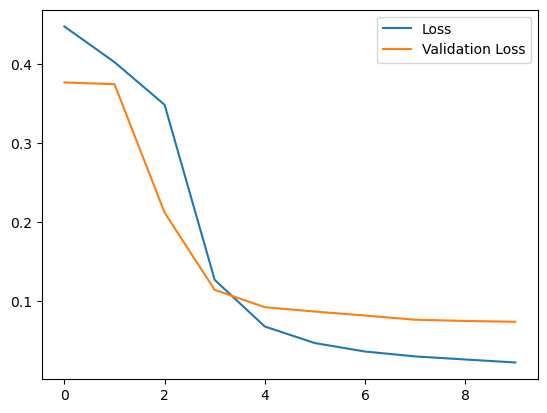

In [34]:
# Loss per iteration
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()

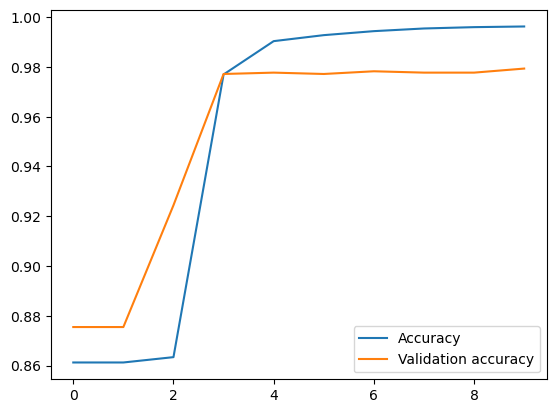

In [35]:
# Accuracy per iteration
plt.plot(history.history['accuracy'], label='Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation accuracy')
plt.legend()
plt.show()

In [36]:
y_pred=model.predict(testing_padded)

58/58 [==============================] - 3s 33ms/step


In [37]:
y_pred=y_pred>0.5

In [38]:
y_pred

array([[False],
       [False],
       [False],
       ...,
       [ True],
       [False],
       [False]])

In [39]:
y_pred=y_pred.astype(int)

In [40]:
from sklearn.metrics import accuracy_score

In [41]:
accuracy_score(y_pred,y_test)

0.9793365959760739